# **Welcome to the Video Games Dataset:** By Michael Arthur

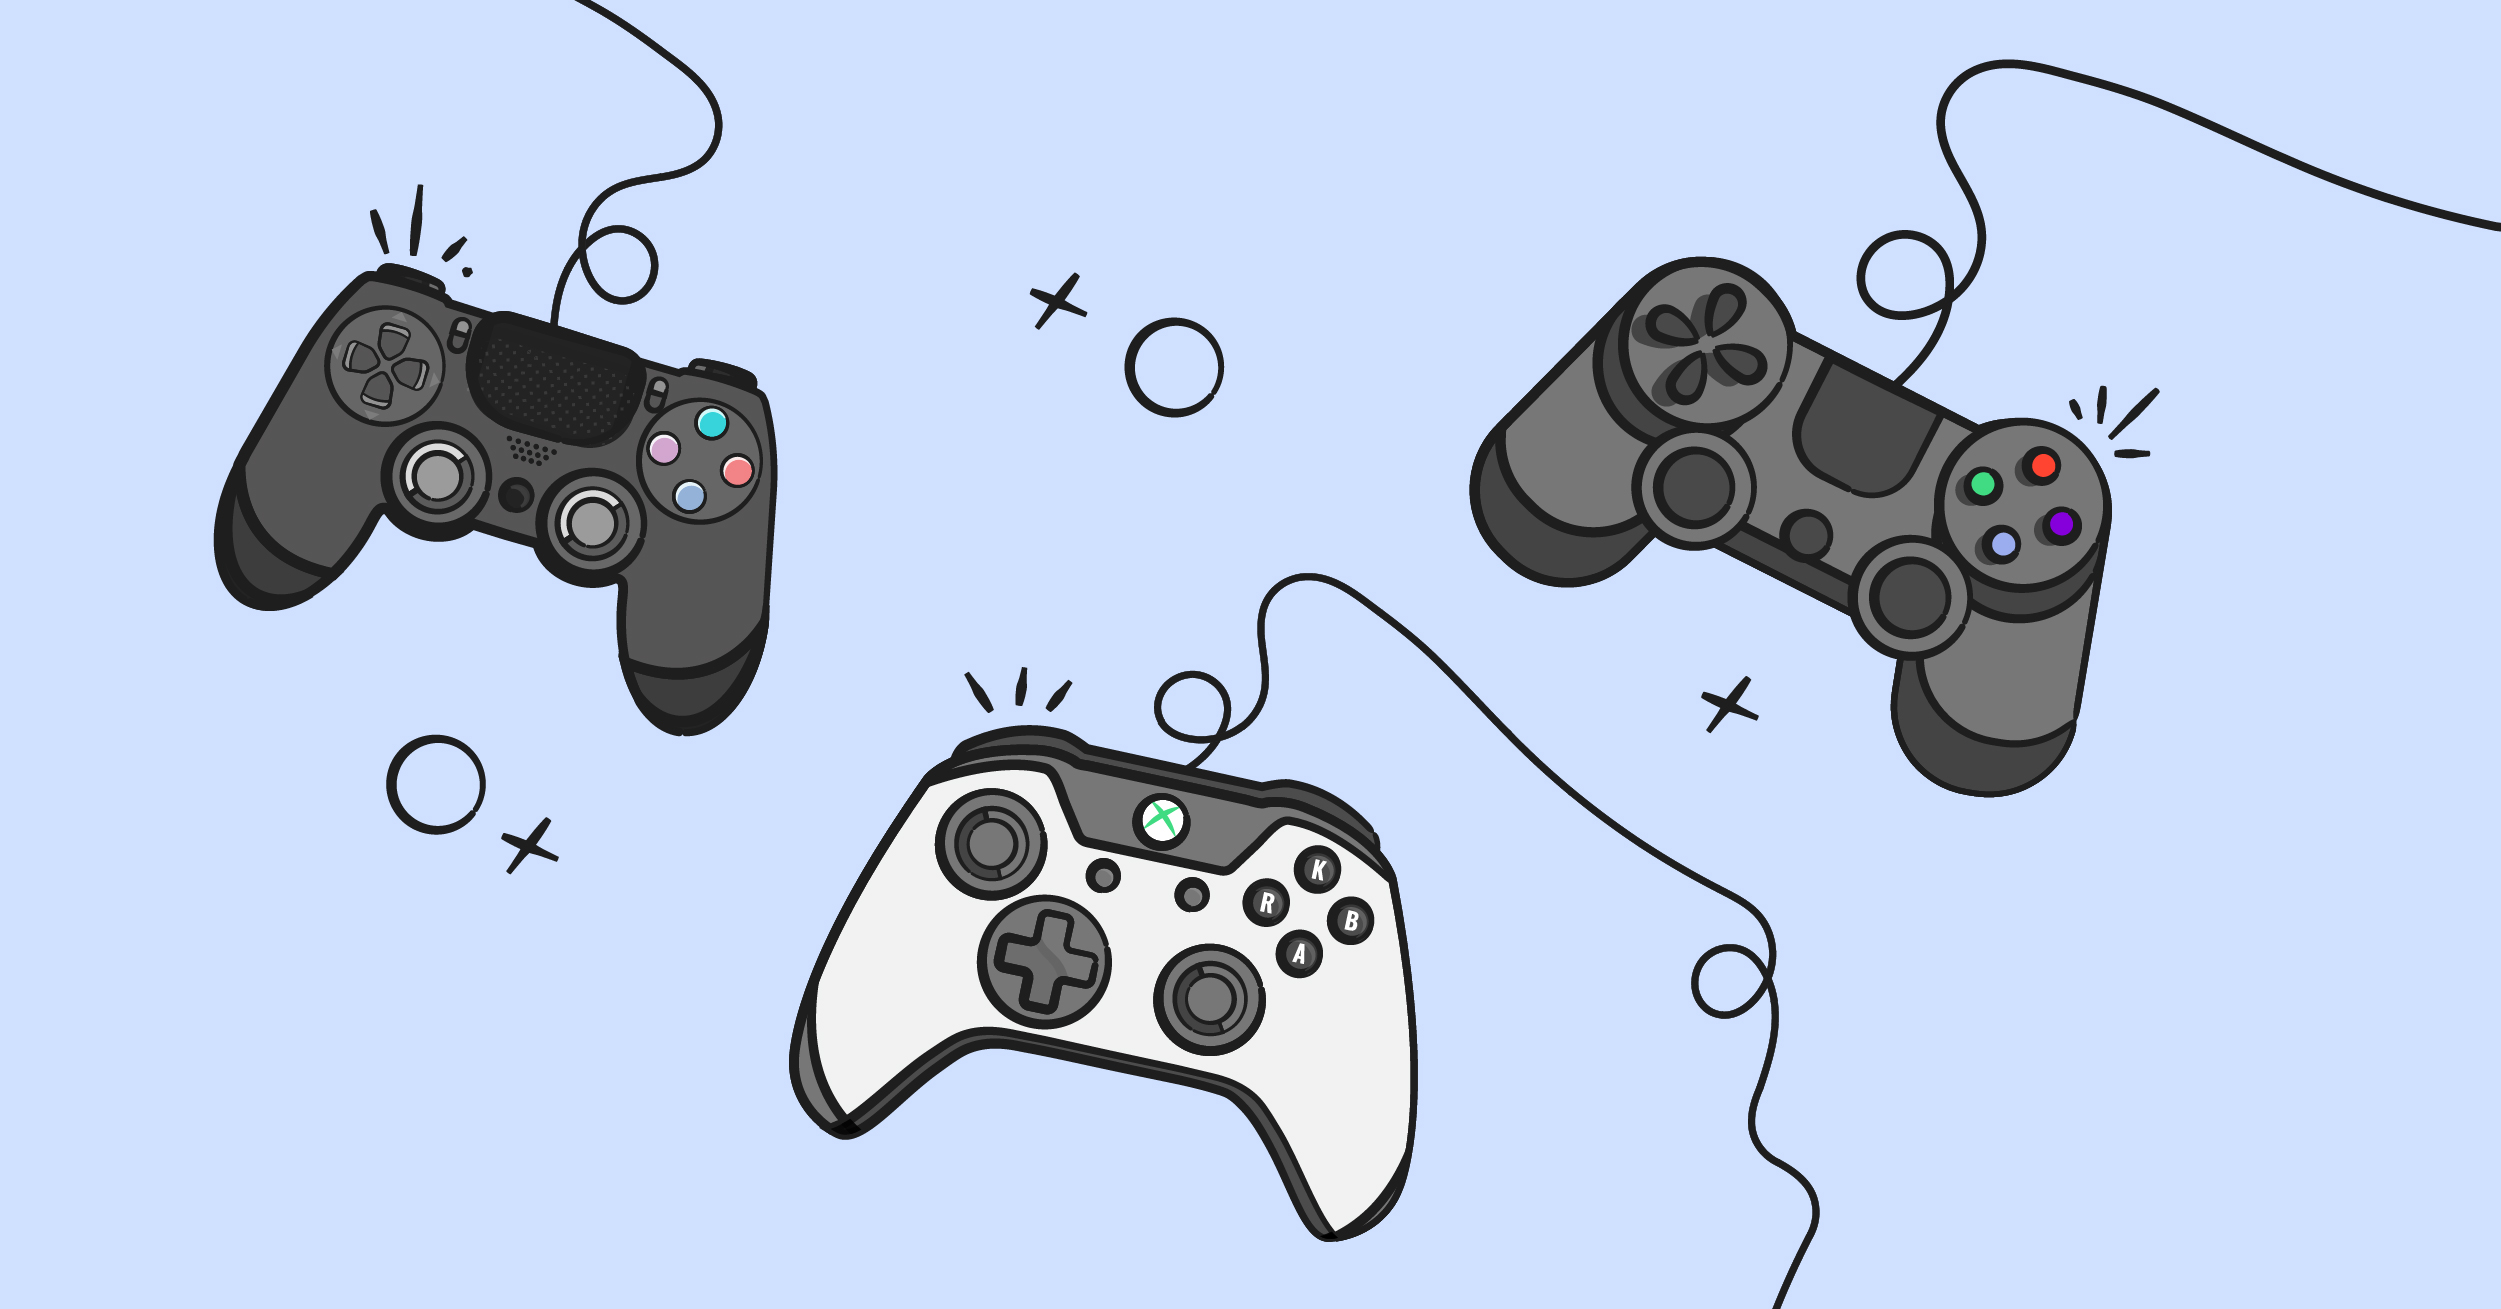

The Video Games Sales and Ratings Dataset provides an in-depth view into the dynamic world of video games, offering a comprehensive analysis of sales and ratings across diverse platforms and publishers. This dataset contains valuable facets of information that bring to light various insights about the video game industry over the years.
- [Data](https://www.kaggle.com/datasets/thedevastator/video-game-sales-and-ratings/data)

**Questions**

1. What region has the most sales
2. what genre sells the best
3. where the top genre sells the most
4. Developer that sells the most
5. Platform with the most sales

**Understanding the Data**

- Name: This attributes refers to the name of each video game included in the dataset.
- Platform: This denotes the platform(s) on which a particular game operates.
- Year_of_Release: The year when a particular game was launched is depicted by this attribute.
- Genre: It indicates what type of genre does a certain video game correspond to.
- Publisher & Developer: These fields detail out which company has published and developed every game respectively.
- NA_Sales, EU_Sales, JP_Sales & Other_Sales: These signify sales numbers from North America (NA), Europe(EU), Japan(JP) regions as well as other parts of world respectively (measured in millions).
- Global_Sales: This category refers to overall international sales for each described gaming product.
- Critic_Score & User_score: It represents average scores attributed by critics or users; where higher indicates better reception mostly measured on a scale often spanning 0–10 or 0–100.
- Critic_Count & User_Count: They denote how many critics/users have rated particular games respectively.
- Rating: ESRB's categorization for games (e.g., E for Everyone,T for Teen,M for Mature etc.) is portrayed through it.

#Imports

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [61]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Projects/Video Game Sales/Video_Games.csv")
df.head()

,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


##Data Cleaning

In [62]:
df.shape

(16928, 17)

In [63]:
df.isnull().sum()

index                 0
Name                  2
Platform              0
Year_of_Release     273
Genre                 2
Publisher            55
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8668
Critic_Count       8668
User_Score         6769
User_Count         9210
Developer          6688
Rating             6836
dtype: int64

In [64]:
missing_percentage = (df.isnull().mean() * 100).round(2)
missing_percentage

index               0.00
Name                0.01
Platform            0.00
Year_of_Release     1.61
Genre               0.01
Publisher           0.32
NA_Sales            0.00
EU_Sales            0.00
JP_Sales            0.00
Other_Sales         0.00
Global_Sales        0.00
Critic_Score       51.21
Critic_Count       51.21
User_Score         39.99
User_Count         54.41
Developer          39.51
Rating             40.38
dtype: float64

In [65]:
# drop rows missing high amounts of data
df = df.dropna(subset=['Year_of_Release', 'Publisher', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating' ])
df.isnull().sum()

index              0
Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

In [66]:
df.duplicated().sum()

0

In [67]:
df['Year_of_Release'] = df['Year_of_Release'].astype(str).str.replace('.0', '', regex=False)
df.head()

<ipython-input-67-567340782d18>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year_of_Release'] = df['Year_of_Release'].astype(str).str.replace('.0', '', regex=False)


,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,7,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [68]:
df['Year_of_Release'].max()

'2016'

In [69]:
df['Year_of_Release'].min()

'1985'

#Download Clean DF

In [70]:
#from google.colab import files
#df.to_csv("video_games_cleaned.csv", index=False)
#files.download("video_games_cleaned.csv")

##Answers to questions

1. North America
2. Action
3. North America
4. Nintendo
5. PS2